In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

##Analise Exploratória

In [2]:
#ler o arquivo
imoveis = pd.read_csv('sao-paulo-properties-april-2019.csv')

In [3]:
imoveis.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [4]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [5]:
#Aqui iremos verificar o tipo de negociação
imoveis['Negotiation Type'].value_counts()

,count
Negotiation Type,
rent,7228
sale,6412


In [6]:
#Criar um novo dataframe somente de alugueis
venda = imoveis[imoveis['Negotiation Type'] == 'sale']
aluguel = imoveis[imoveis['Negotiation Type'] == 'rent']

In [7]:
aluguel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7228 entries, 0 to 11209
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             7228 non-null   int64  
 1   Condo             7228 non-null   int64  
 2   Size              7228 non-null   int64  
 3   Rooms             7228 non-null   int64  
 4   Toilets           7228 non-null   int64  
 5   Suites            7228 non-null   int64  
 6   Parking           7228 non-null   int64  
 7   Elevator          7228 non-null   int64  
 8   Furnished         7228 non-null   int64  
 9   Swimming Pool     7228 non-null   int64  
 10  New               7228 non-null   int64  
 11  District          7228 non-null   object 
 12  Negotiation Type  7228 non-null   object 
 13  Property Type     7228 non-null   object 
 14  Latitude          7228 non-null   float64
 15  Longitude         7228 non-null   float64
dtypes: float64(2), int64(11), object(3)
memory usa

In [8]:
aluguel['Negotiation Type'].value_counts()

,count
Negotiation Type,
rent,7228


In [9]:
aluguel.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [10]:
#verificar como está a distribuição
aluguel.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,-22.032278,-43.500873
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,5.962534,11.675070
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598066,-46.689788
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555869,-46.644793
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.522756,-46.585110
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Condo'}>,
        <Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Rooms'}>],
       [<Axes: title={'center': 'Toilets'}>,
        <Axes: title={'center': 'Suites'}>,
        <Axes: title={'center': 'Parking'}>,
        <Axes: title={'center': 'Elevator'}>],
       [<Axes: title={'center': 'Furnished'}>,
        <Axes: title={'center': 'Swimming Pool'}>,
        <Axes: title={'center': 'New'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

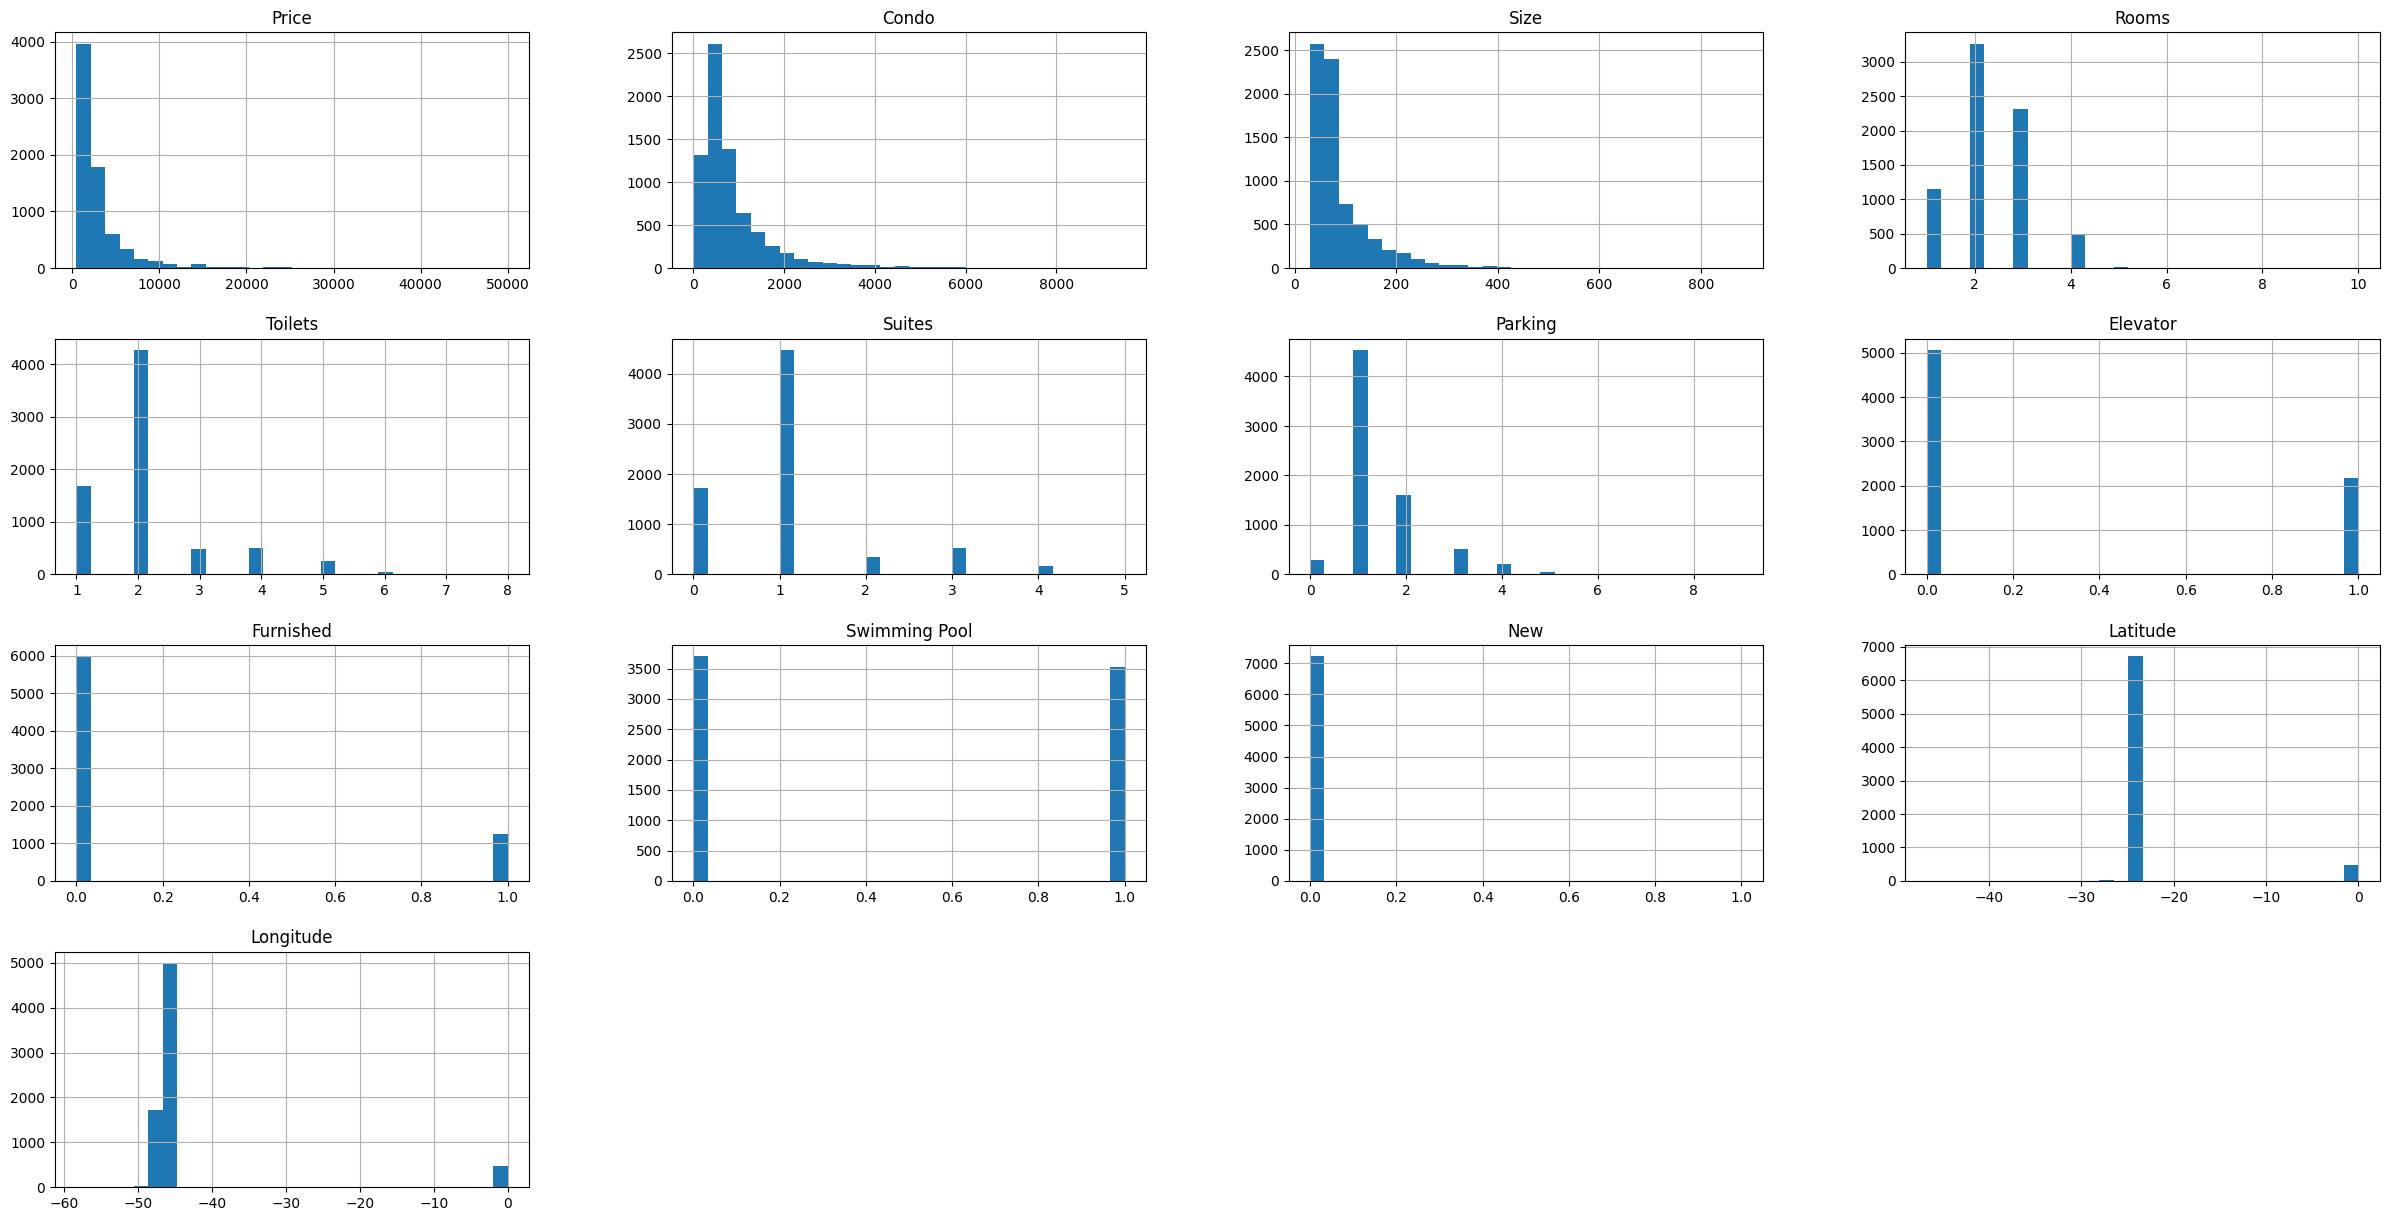

In [11]:
aluguel.hist(bins=30, figsize=(30,15))

In [12]:
#Verificar se o predio é novo ou velho
aluguel['New'].value_counts()

,count
New,
0,7222
1,6


In [13]:
#Verificar apartamento ou casa
aluguel['Property Type'].value_counts()

,count
Property Type,
apartment,7228


In [14]:
aluguel['District'].value_counts()

,count
District,
Mooca/São Paulo,178
Moema/São Paulo,163
Vila Mariana/São Paulo,161
Morumbi/São Paulo,159
Pinheiros/São Paulo,153
...,...
Lajeado/São Paulo,8
Guaianazes/São Paulo,6
Parque do Carmo/São Paulo,6


In [15]:
aluguel.corr(numeric_only=True)['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Size,0.731795
Condo,0.700361
Parking,0.640743
Suites,0.588329
Toilets,0.583488
Rooms,0.390951
Swimming Pool,0.206884
Furnished,0.171859
Elevator,0.031860


## Limpeza de dados desnecessários

In [16]:
dados_limpos = aluguel.drop(['New', 'Property Type', 'Negotiation Type'], axis=1)

In [17]:
dados_limpos.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,Artur Alvim/São Paulo,-23.525025,-46.482436


##Tratamento dados categoricos


In [18]:
#Agora iniciaremos de fato os nossos modelos de machine Learning
#encoded significa codificado
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

district_encoded = ordinal_encoder.fit_transform(dados_limpos[['District']])

district_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [9.],
       [9.],
       [9.]])

In [21]:
dados_limpos['District'].unique()

array(['Artur Alvim/São Paulo', 'Belém/São Paulo', 'Cangaíba/São Paulo',
       'Carrão/São Paulo', 'Cidade Líder/São Paulo',
       'Cidade Tiradentes/São Paulo', 'Ermelino Matarazzo/São Paulo',
       'Iguatemi/São Paulo', 'Itaim Paulista/São Paulo',
       'Itaquera/São Paulo', 'Jardim Helena/São Paulo',
       'José Bonifácio/São Paulo', 'Lajeado/São Paulo',
       'Parque do Carmo/São Paulo', 'Penha/São Paulo',
       'Ponte Rasa/São Paulo', 'Sapopemba/São Paulo',
       'São Lucas/São Paulo', 'São Mateus/São Paulo',
       'São Miguel/São Paulo', 'São Rafael/São Paulo',
       'Tatuapé/São Paulo', 'Vila Curuçá/São Paulo',
       'Vila Formosa/São Paulo', 'Vila Jacuí/São Paulo',
       'Vila Matilde/São Paulo', 'Vila Prudente/São Paulo',
       'Cambuci/São Paulo', 'Campo Belo/São Paulo',
       'Campo Grande/São Paulo', 'Campo Limpo/São Paulo',
       'Capão Redondo/São Paulo', 'Cidade Ademar/São Paulo',
       'Cidade Dutra/São Paulo', 'Cursino/São Paulo', 'Grajaú/São Paulo',
  

In [22]:
#Infelizmente, como são muitos bairros diferentes, utilizaremos outro metodo, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

district_1hot = cat_encoder.fit_transform(dados_limpos[['District']])
district_1hot


<7228x94 sparse matrix of type '<class 'numpy.float64'>'
	with 7228 stored elements in Compressed Sparse Row format>

In [23]:
district_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
#verificar número de colunas criadas
district_1hot.shape

(7228, 94)

In [25]:
cat_encoder.categories_

[array(['Alto de Pinheiros/São Paulo', 'Anhanguera/São Paulo',
        'Aricanduva/São Paulo', 'Artur Alvim/São Paulo',
        'Barra Funda/São Paulo', 'Bela Vista/São Paulo', 'Belém/São Paulo',
        'Bom Retiro/São Paulo', 'Brasilândia/São Paulo',
        'Brooklin/São Paulo', 'Brás/São Paulo', 'Butantã/São Paulo',
        'Cachoeirinha/São Paulo', 'Cambuci/São Paulo',
        'Campo Belo/São Paulo', 'Campo Grande/São Paulo',
        'Campo Limpo/São Paulo', 'Cangaíba/São Paulo',
        'Capão Redondo/São Paulo', 'Carrão/São Paulo',
        'Casa Verde/São Paulo', 'Cidade Ademar/São Paulo',
        'Cidade Dutra/São Paulo', 'Cidade Líder/São Paulo',
        'Cidade Tiradentes/São Paulo', 'Consolação/São Paulo',
        'Cursino/São Paulo', 'Ermelino Matarazzo/São Paulo',
        'Freguesia do Ó/São Paulo', 'Grajaú/São Paulo',
        'Guaianazes/São Paulo', 'Iguatemi/São Paulo', 'Ipiranga/São Paulo',
        'Itaim Bibi/São Paulo', 'Itaim Paulista/São Paulo',
        'Itaquera/Sã

In [26]:
one_hot = pd.get_dummies(dados_limpos['District'], dtype=int)

dados_limpos = dados_limpos.drop('District', axis=1)

dados_limpos = dados_limpos.join(one_hot)

dados_limpos

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,930,220,47,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000,148,45,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000,100,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000,200,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1300,410,55,2,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11206,21000,3000,208,4,4,3,3,1,1,1,...,0,0,0,0,0,0,0,0,0,0
11207,3800,710,55,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
11208,5000,2354,205,3,2,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


##Selecione e treine multiplos dados

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Defini uma váriavel chamada Y que nada mais é do que a coluna price e uma chamada X que é tudo menos Price
Y = dados_limpos['Price']
X = dados_limpos.loc[:, dados_limpos.columns != 'Price']

In [29]:
X.head()

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,Latitude,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,220,47,2,2,1,1,0,0,0,-23.543138,...,0,0,0,0,0,0,0,0,0,0
1,148,45,2,2,1,1,0,0,0,-23.550239,...,0,0,0,0,0,0,0,0,0,0
2,100,48,2,2,1,1,0,0,0,-23.542818,...,0,0,0,0,0,0,0,0,0,0
3,200,48,2,2,1,1,0,0,0,-23.547171,...,0,0,0,0,0,0,0,0,0,0
4,410,55,2,2,1,1,1,0,0,-23.525025,...,0,0,0,0,0,0,0,0,0,0


In [30]:
Y.head()

,Price
0,930
1,1000
2,1000
3,1000
4,1300


In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

##Regressão linear

In [32]:
from sklearn.linear_model import LinearRegression
#o linear regression é o algoritmo de regressão linear

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)


LinearRegression()

In [33]:
alguns_dados = X.iloc[:5]
alguns_precos = Y.iloc[:5]

print('Predições:', lin_reg.predict(alguns_dados))
print('Valores Reais:', list(alguns_precos))


Predições: [ 858.78405762  777.89819336  850.10595703  881.55700684 1100.37194824]
Valores Reais: [930, 1000, 1000, 1000, 1300]


In [34]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, preds)

lin_rmse = np.sqrt(lin_mse)
lin_rmse


1969.217880521455

## Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [36]:
preds = tree_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, preds)

lin_rmse = np.sqrt(lin_mse)
lin_rmse


43.500635030683654

## Avaliação mais precisa Cross-Validation


In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [1929.99730859 1694.21867164 1984.25298477 2442.57342343 2292.36753425
 2110.80577983 2583.13097108 2613.35001925 2187.4650109  2594.92524015]
Mean: 2243.3086943883395
Standard deviation: 300.932955440059


In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)

lin_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [1756.80022303 1651.1459352  1845.129039   2399.70570165 1837.49155336
 1895.07577666 2337.87709577 2197.30809746 2138.23906931 1948.85564269]
Mean: 2000.7628134126292
Standard deviation: 240.1716936489999


## Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [40]:
preds = rf_reg.predict(x_train)
rf_mse = mean_squared_error(y_train, preds)

rf_rmse = np.sqrt(rf_mse)
rf_rmse

665.7434521215401

In [41]:
scores = cross_val_score(rf_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)

rf_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rf_rmse_scores)

Scores: [1396.83858417 1348.99046062 1476.02189768 2323.78703496 1755.33315424
 1741.64349912 2113.76295922 1863.72580214 1914.25564808 1975.95635946]
Mean: 1791.0315399692663
Standard deviation: 299.39653340378


##Avaliando o modelo e otimizando-o


In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [43]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [44]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [45]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_rmse)


1672.7978747620111


In [46]:
fig = go.Figure(data=[go.Scatter(y=y_test.values), go.Scatter(y=final_predictions)])
# a linha azul diz quando o valor realmente
# a linha vermelha diz quanto a maquina previu
fig.show()